# Mechanical parts recognition - Evaluation


Author: Y. Staeva

The purpose of this notebook is to evaluate the Deep Learning Convolutional Neural Network created in the previous script for Image classification of Mechanical parts.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### Load test images

In [2]:
imagegen_test = ImageDataGenerator(rescale= 1/255)
images_test = imagegen_test.flow_from_directory("/content/drive/MyDrive/testing-parts",
                                               class_mode = "categorical",
                                               shuffle = False,
                                               batch_size = 70,
                                               target_size = (224,224))

Found 778 images belonging to 4 classes.


**Save true labels in variable true labels**

In [3]:
true_labels = images_test.labels
true_labels.shape

(778,)

In [4]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Load Deep Learning model

In [5]:
deep_cnn = load_model('/content/drive/MyDrive/best_mech_cnn_2.h5')

In [6]:
deep_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 15)      420       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 15)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 37, 37, 15)       60        
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 20535)             0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 20535)            0         
 se)                                                             
                                                        

In [7]:
deep_cnn.get_weights()

[array([[[[ 1.07299671e-01,  7.67912343e-02,  8.60922784e-02,
            3.45091894e-03, -6.22137003e-02, -1.58007100e-01,
            1.08541138e-01,  8.00310746e-02,  2.97930241e-02,
           -5.88893965e-02,  1.14960775e-01,  1.17752068e-01,
           -6.13646209e-02,  7.18027800e-02,  2.15933209e-08],
          [ 5.67778852e-03, -1.22576416e-01, -1.05869934e-01,
            8.37987568e-03, -9.95948464e-02, -1.24637127e-01,
            9.53797475e-02,  1.95410356e-01,  1.85894184e-02,
            1.13249488e-01, -1.57546192e-01,  2.12142199e-01,
           -9.70987603e-02, -1.70523468e-02, -7.57047103e-32],
          [-1.49401218e-01,  2.72286888e-02, -6.37133121e-02,
           -3.10221370e-02,  1.68137372e-01,  4.73715477e-02,
           -6.52842522e-02, -2.77758855e-02, -9.15024579e-02,
            1.81610838e-01,  5.14102876e-02,  7.42233079e-03,
            1.95393935e-01, -5.72335795e-02, -5.87298200e-02]],
 
         [[ 1.23445079e-01,  1.42663196e-01,  1.94700181e-01,
  

### Make predictions on the test image set

**Save predicted labels in predictions variable**

In [8]:
predictions = deep_cnn.predict(images_test, batch_size = 70)

In [9]:
predictions

array([[0.95074093, 0.00546323, 0.04229898, 0.00149686],
       [0.88498294, 0.04528028, 0.06807791, 0.00165891],
       [0.8861196 , 0.05106945, 0.06156752, 0.0012434 ],
       ...,
       [0.00382499, 0.12144247, 0.14544922, 0.72928333],
       [0.00156851, 0.11886162, 0.12395523, 0.75561464],
       [0.0027125 , 0.12669924, 0.12888728, 0.74170095]], dtype=float32)

**Round the predicted values**

In [10]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [11]:
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Build a confusion matrix

In [12]:
confusion_matrix = confusion_matrix(y_true = true_labels, y_pred = rounded_predictions)

In [13]:
classes = ['Bolt','Locating pin', 'Nut', 'Washer']

In [14]:
def plot_confusion_matrix(confusion_matrix, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  plt.imshow(confusion_matrix, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks,classes)

  print(confusion_matrix)

[[192   0   0   0]
 [ 20 162   6   4]
 [  0   0 190   2]
 [  0   0   3 199]]


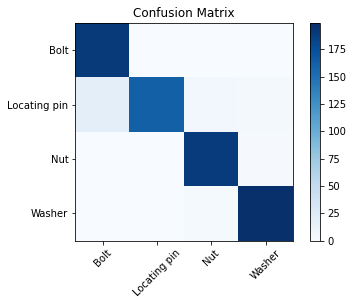

In [15]:
plot_confusion_matrix(confusion_matrix, classes)

Good luck!